In [267]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import matplotlib
import seaborn as sns
import plotly.graph_objs as go
import pickle

In [ ]:
# modeling_data, promotion_data 나누기,

In [215]:
modeling_data,promotion_data =train_test_split(g, test_size=0.1, random_state=0)

In [217]:
promotion_data.to_csv('../../data/Data_Team-dataset/promotion_data.csv',index=False)

In [218]:
modeling_data.to_csv('../../data/Data_Team-dataset/game_data_base.csv',index=False)

In [219]:
g=pd.read_csv('../../data/Data_Team-dataset/game_data_base.csv')

In [220]:
g.shape

(90000, 120)

In [221]:
train,validation=train_test_split(g,test_size=2/9,random_state=42)

In [222]:
train.shape

(70000, 120)

In [223]:
validation.shape

(20000, 120)

In [224]:
train.to_csv('../../data/Data_team-dataset/game_data_train.csv',index=False)
validation.to_csv('../../data/Data_team-dataset/game_data_validation.csv',index=False)

In [233]:
train=pd.read_csv('../../data/Data_team-dataset/game_data_train.csv')


In [256]:
train.shape

(70000, 119)

In [235]:
train['label']

0        0
1        0
2        0
3        0
4        0
5        1
6        0
7        0
8        0
9        0
10       0
11       1
12       1
13       1
14       1
15       0
16       0
17       0
18       1
19       0
20       0
21       1
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
69970    0
69971    1
69972    0
69973    0
69974    0
69975    1
69976    0
69977    0
69978    0
69979    0
69980    0
69981    0
69982    0
69983    1
69984    0
69985    1
69986    0
69987    0
69988    0
69989    1
69990    0
69991    0
69992    0
69993    1
69994    0
69995    1
69996    0
69997    0
69998    0
69999    0
Name: label, Length: 70000, dtype: int64

In [236]:
y=train['label']
x=train.drop(['acc_id','label'],axis=1)

In [237]:
train_test_acc = list()

for i in range(1,21):
    tree = DecisionTreeClassifier(max_depth=i, random_state=42)
    tree.fit(x, y)
    train_test_acc.append({'max_depth':i, 'accuracy':tree.score(x, y), 'label':'train'})
    
train_test_df = pd.DataFrame(train_test_acc)
train_test_df.head()


,accuracy,label,max_depth
0,0.833500,train,1
1,0.833500,train,2
2,0.848600,train,3
3,0.857771,train,4
4,0.868886,train,5


In [238]:
train_test_df.sort_values(by='accuracy',ascending=False)

,accuracy,label,max_depth
19,0.967843,train,20
18,0.963700,train,19
17,0.958643,train,18
16,0.954214,train,17
15,0.949071,train,16
14,0.943886,train,15
13,0.937757,train,14
12,0.930871,train,13
11,0.922700,train,12
10,0.915443,train,11


In [239]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(x, y)
tree.score(x,y)

0.9981571428571429

In [240]:
tree=DecisionTreeClassifier(max_depth=12, random_state=0).fit(x,y)

In [241]:
f=pd.DataFrame(data={'columns':x.columns,'feature_importance':tree.feature_importances_})
f2=f.sort_values(by='feature_importance',ascending=False).reset_index().drop('index',axis=1)

In [242]:
f2

,columns,feature_importance
0,total_item_hongmun,0.402878
1,total_cnt_wk,0.073944
2,total_quest_hongmun,0.066325
3,week8_play_time,0.045845
4,total_cnt_clear_raid_light,0.038237
5,week4_play_time,0.031297
6,total_guild_chat,0.025375
7,total_play_time,0.022981
8,week8_cnt_dt,0.020065
9,week7_play_time,0.017507


In [ ]:
# vif 제거 전 0.01 cutoff 일 때 feature importance

In [245]:
f=f2[f2['feature_importance']>0.01]

In [246]:
f

,columns,feature_importance
0,total_item_hongmun,0.402878
1,total_cnt_wk,0.073944
2,total_quest_hongmun,0.066325
3,week8_play_time,0.045845
4,total_cnt_clear_raid_light,0.038237
5,week4_play_time,0.031297
6,total_guild_chat,0.025375
7,total_play_time,0.022981
8,week8_cnt_dt,0.020065
9,week7_play_time,0.017507


In [ ]:
#vif 진행 후 파일 불러와서 feature importance 뽑아보기

In [247]:
v=pd.read_csv('../../workspace/usuniii/vif_im.csv')

In [248]:
v1=v.columns.tolist()

In [249]:
train_v=train[v1]

In [250]:
train_v.shape

(70000, 70)

In [259]:
v1

['week2_cnt_dt',
 'week3_cnt_dt',
 'week4_cnt_dt',
 'week5_cnt_dt',
 'week6_cnt_dt',
 'week7_cnt_dt',
 'week8_cnt_dt',
 'week2_play_time',
 'week3_play_time',
 'week4_play_time',
 'week5_play_time',
 'week6_play_time',
 'week7_play_time',
 'week8_play_time',
 'total_npc_exp',
 'total_npc_hongmun',
 'total_quest_hongmun',
 'total_item_hongmun',
 'total_get_money',
 'total_duel_win',
 'total_partybattle_cnt',
 'total_cnt_enter_inzone_skilled',
 'total_cnt_enter_raid',
 'total_cnt_enter_raid_light',
 'total_cnt_enter_bam',
 'total_cnt_clear_inzone_solo',
 'total_cnt_clear_bam',
 'total_party_chat',
 'total_guild_chat',
 'total_faction_chat',
 'total_gathering_cnt',
 'total_making_cnt',
 'week2_is_connected',
 'week5_is_connected',
 'week6_is_connected',
 'week7_is_connected',
 'week2_payment',
 'week3_payment',
 'week4_payment',
 'week5_payment',
 'week6_payment',
 'week7_payment',
 'week8_payment',
 'guild_join',
 'cnt_gem_target',
 'cnt_gem_source',
 'cnt_accessory_target',
 'cnt_access

In [251]:
y1=train['label']
x1=train_v

In [270]:
x

,week1_cnt_dt,week2_cnt_dt,week3_cnt_dt,week4_cnt_dt,week5_cnt_dt,week6_cnt_dt,week7_cnt_dt,week8_cnt_dt,total_cnt_dt,week1_play_time,...,party_mon_cnt,party_tue_cnt,party_wed_cnt,party_thurs_cnt,party_fri_cnt,party_sat_cnt,party_sun_cnt,party_number,party_member_number,total_cnt_wk
0,-0.633771,-0.695061,-0.810572,-0.870099,-0.882377,-0.054574,0.806140,-0.025303,-3.165617,-0.661667,...,-0.388782,-0.401680,-0.400255,-0.434942,-0.459706,-0.394058,-0.406789,-0.437160,-0.505762,3
1,-0.633771,-0.695061,1.384870,0.973948,1.677909,0.326559,-1.046647,0.477144,2.464952,-0.661667,...,-0.388782,-0.401680,-0.400255,-0.434942,-0.459706,-0.394058,-0.406789,-0.437160,-0.505762,5
2,0.902057,1.608907,1.750777,1.711567,1.677909,1.851092,1.547255,0.477144,11.526708,-0.551159,...,-0.144346,-0.074588,-0.227659,-0.092957,-0.222438,-0.209289,-0.230943,-0.178834,-0.163794,8
3,0.902057,0.072928,1.018963,0.236329,0.946398,1.088825,0.435583,0.979592,5.680676,-0.656415,...,-0.388782,-0.401680,-0.400255,-0.434942,-0.459706,-0.394058,-0.406789,-0.437160,-0.505762,8
4,-0.633771,-0.695061,-0.810572,-0.870099,-0.882377,-0.816841,-0.305532,0.477144,-4.537108,-0.661667,...,-0.388782,-0.401680,-0.400255,-0.434942,-0.459706,-0.394058,-0.406789,-0.437160,-0.505762,2
5,2.053927,1.992902,1.750777,1.711567,1.677909,1.851092,1.547255,1.482040,14.067468,2.496724,...,5.263797,4.919012,4.799201,4.029866,4.068167,3.190460,4.126123,4.546634,6.205278,8
6,-0.633771,-0.311066,-0.444665,-0.501289,-0.516622,-0.816841,-1.046647,0.477144,-3.793756,-0.661667,...,-0.327673,-0.401680,-0.141361,0.173032,0.884815,0.086342,-0.074636,0.057439,0.081293,5
7,-0.633771,-0.695061,-0.810572,-0.870099,-0.882377,-0.816841,-1.046647,-1.532646,-7.288013,-0.661667,...,-0.388782,-0.401680,-0.400255,-0.434942,-0.459706,-0.394058,-0.406789,-0.437160,-0.505762,1
8,-0.633771,-0.695061,-0.810572,-0.870099,-0.882377,1.088825,0.806140,0.477144,-1.519770,-0.661667,...,-0.388782,-0.401680,-0.400255,-0.434942,-0.459706,-0.394058,-0.406789,-0.437160,-0.505762,3
9,-0.633771,-0.695061,-0.810572,-0.870099,-0.882377,-0.816841,-1.046647,0.477144,-5.278222,-0.661667,...,-0.388782,-0.401680,-0.400255,-0.434942,-0.459706,-0.394058,-0.406789,-0.437160,-0.505762,1


In [271]:
tree1=DecisionTreeClassifier(max_depth=12, random_state=0).fit(x,y)

In [263]:
f=pd.DataFrame(data={'columns':x1.columns,'feature_importance':tree1.feature_importances_})

In [264]:
f2=f.sort_values(by='feature_importance',ascending=False).reset_index().drop('index',axis=1)

In [265]:
f2

,columns,feature_importance
0,total_item_hongmun,0.410504
1,week5_play_time,0.070383
2,week5_cnt_dt,0.055579
3,total_cnt_enter_raid_light,0.040072
4,total_guild_chat,0.033130
5,week8_cnt_dt,0.031665
6,week8_play_time,0.030801
7,total_cnt_clear_inzone_solo,0.026980
8,week6_play_time,0.024697
9,week2_play_time,0.024692


In [266]:
f=f2[f2['feature_importance']>0.01]
f

,columns,feature_importance
0,total_item_hongmun,0.410504
1,week5_play_time,0.070383
2,week5_cnt_dt,0.055579
3,total_cnt_enter_raid_light,0.040072
4,total_guild_chat,0.033130
5,week8_cnt_dt,0.031665
6,week8_play_time,0.030801
7,total_cnt_clear_inzone_solo,0.026980
8,week6_play_time,0.024697
9,week2_play_time,0.024692


In [166]:
important_feature=f['columns'].tolist()
important_feature

['total_quest_gap',
 'total_cnt_wk',
 'total_quest_hongmun',
 'week8_play_time',
 'week4_play_time',
 'total_item_hongmun',
 'guild_join',
 'total_cnt_clear_raid_light',
 'total_play_time',
 'week8_cnt_dt',
 'week7_play_time',
 'total_cnt_dt',
 'week5_play_time',
 'total_quest_exp',
 'total_cnt_clear_inzone_solo',
 'week6_cnt_dt',
 'week6_play_time',
 'week2_play_time',
 'week4_cnt_dt',
 'total_item_amount_source',
 'week5_cnt_dt',
 'total_cnt_use_buffitem',
 'week3_play_time',
 'total_npc_exp',
 'total_partybattle_cnt',
 'party_time_816',
 'week7_cnt_dt',
 'party_time_1624',
 'week1_play_time',
 'total_cnt_enter_inzone_solo',
 'cnt_public_chat',
 'total_game_combat_time',
 'week3_cnt_dt',
 'total_partybattle_win',
 'total_get_money',
 'amount_money_source',
 'total_npc_hongmun',
 'payment',
 'party_fri_cnt',
 'total_whisper_chat',
 'total_making_cnt',
 'total_party_chat']

In [167]:
important_feature+='acc_id','label'

In [168]:
h=g1[important_feature]

In [136]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

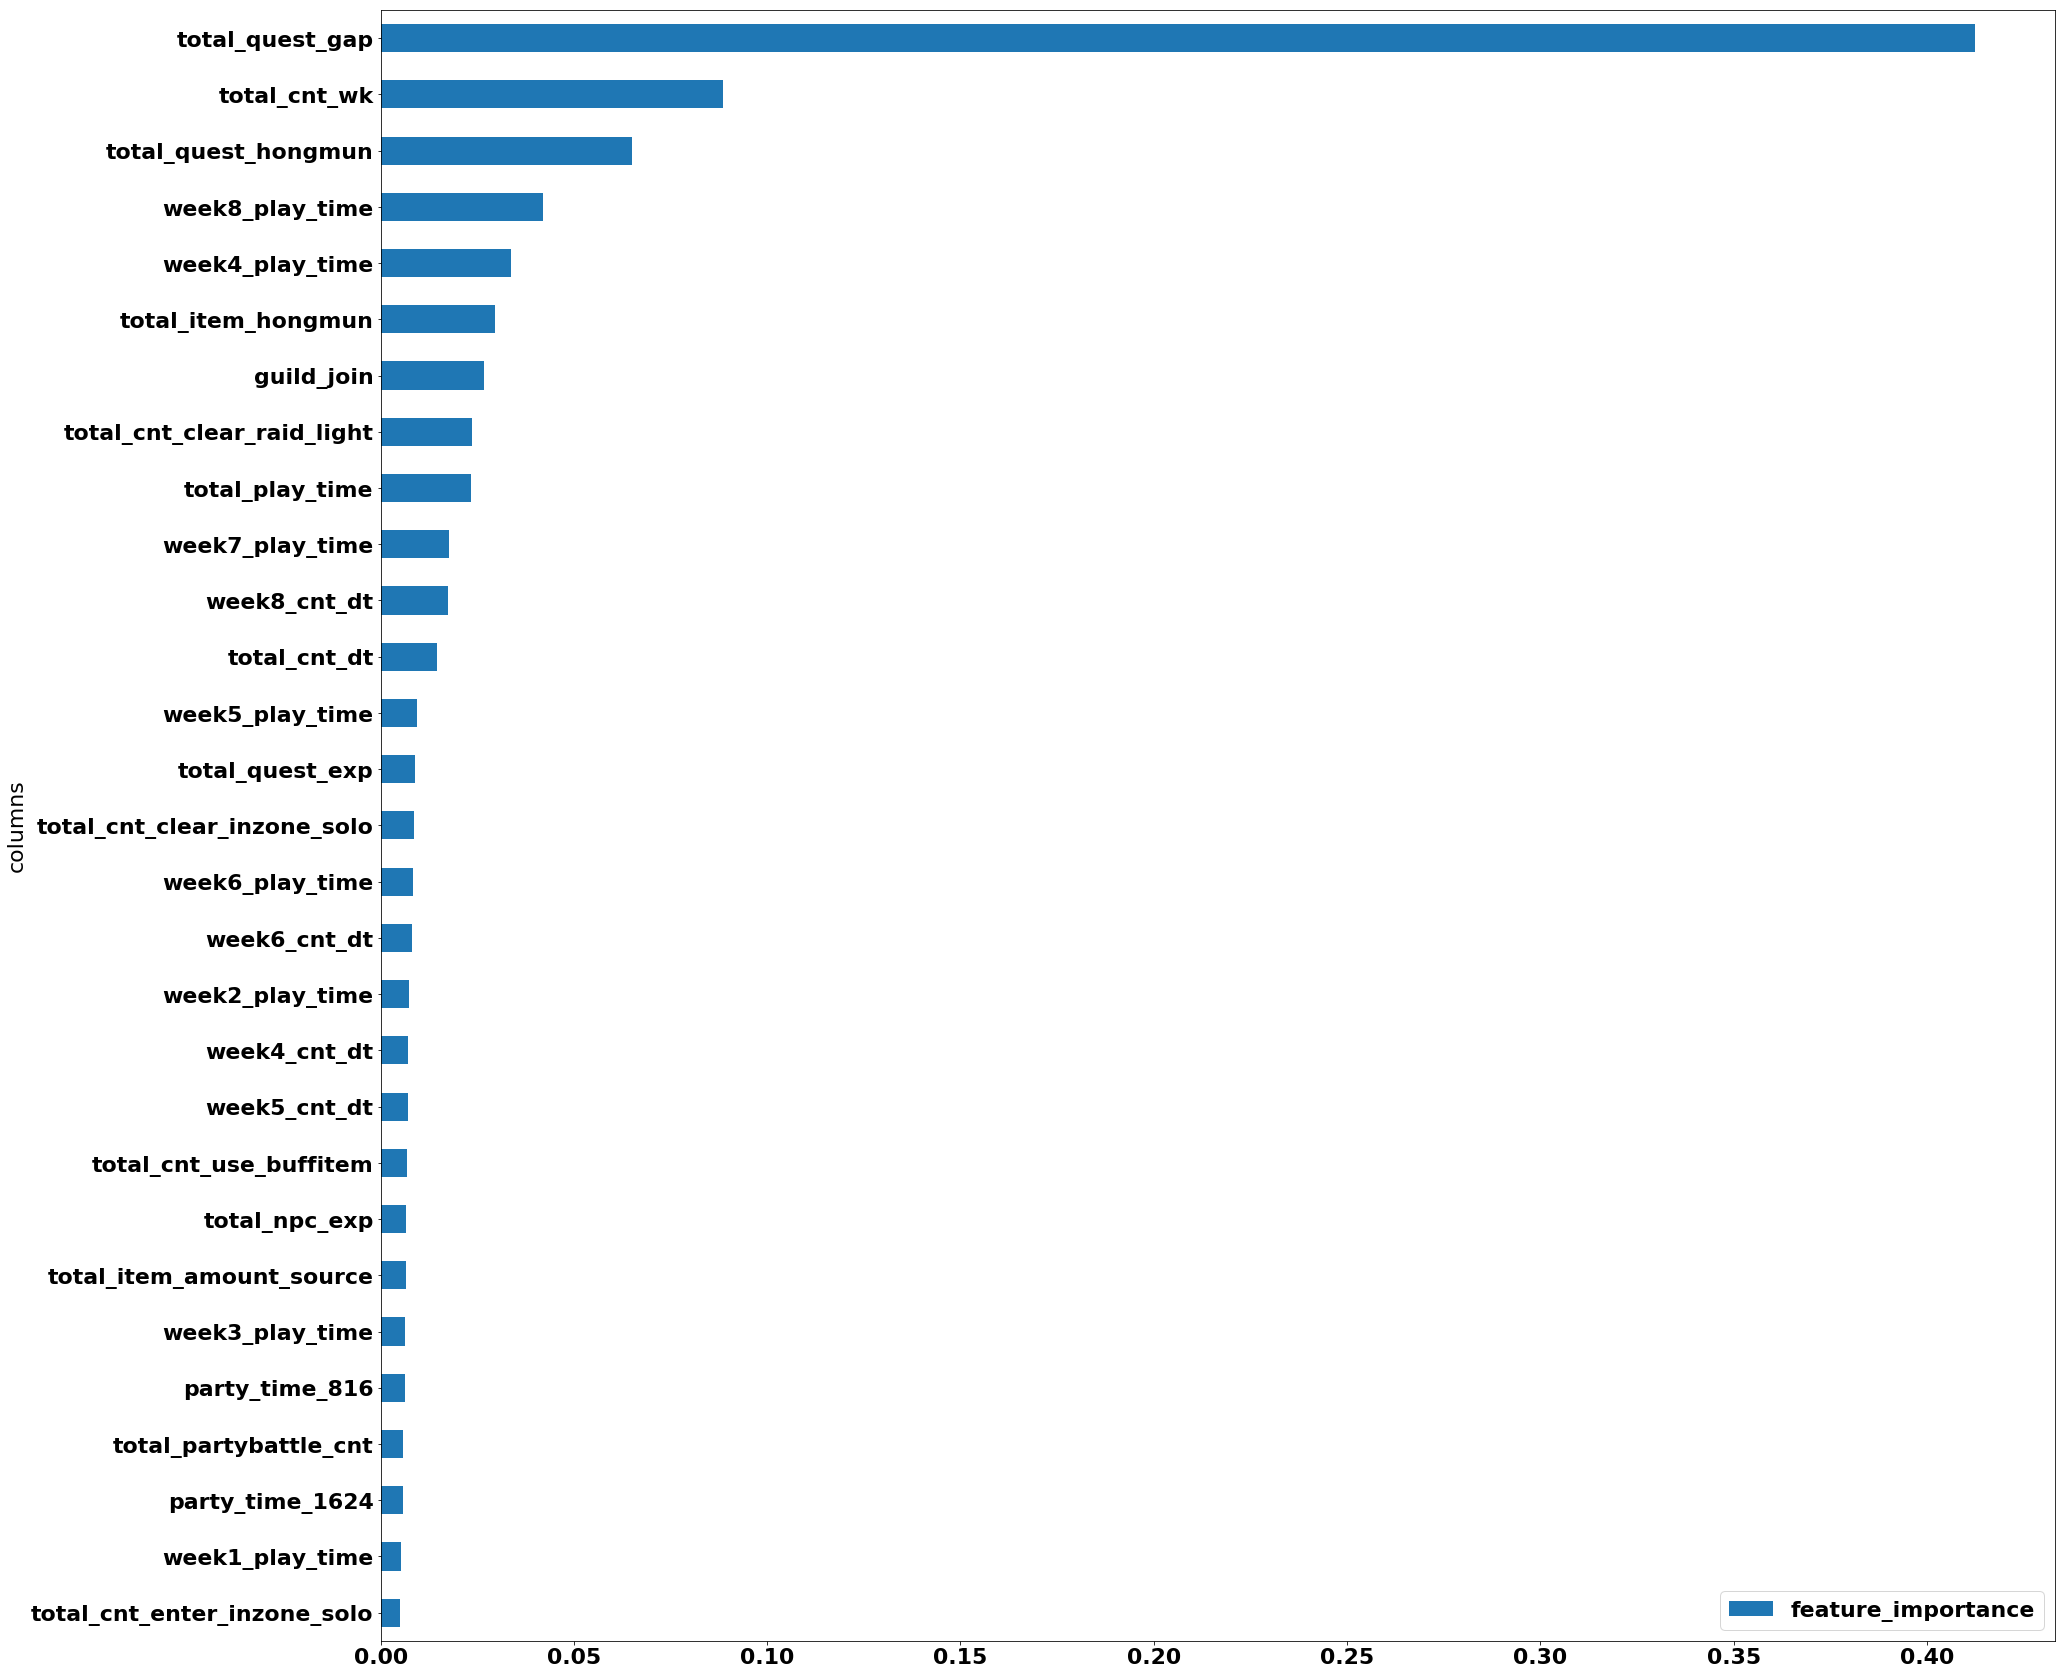

In [137]:
ax=f.plot.barh(x='columns',y='feature_importance',figsize=(30,30))
plt.gca().invert_yaxis()

In [169]:
h.to_csv('../../data/Data_Team-dataset/important_feature_42.csv',index=False)

In [170]:
h

,total_quest_gap,total_cnt_wk,total_quest_hongmun,week8_play_time,week4_play_time,total_item_hongmun,guild_join,total_cnt_clear_raid_light,total_play_time,week8_cnt_dt,...,total_get_money,amount_money_source,total_npc_hongmun,payment,party_fri_cnt,total_whisper_chat,total_making_cnt,total_party_chat,acc_id,label
0,-5.221241,2,6.927875,4.550865,-0.661667,-2.450829,0,-3.209263,3.284972,1.482040,...,-0.188096,-0.571830,-2.221394,0,2.249109,-1.854616,-2.924292,-2.201390,0000264b01392acfde44f9d8494f112a701dc5d3e5fda6...,0
1,-1.897943,8,-3.901330,-0.660906,-0.660085,-2.450829,0,-3.209263,-5.285565,-0.527751,...,-0.188343,5.116742,-2.326426,0,-0.459706,-1.854616,-2.924292,-2.201390,0001f130e89288ff0df167b998f6eb7085687f411fcb72...,1
2,-1.902389,5,-3.901330,-0.656593,-0.659313,-2.450829,0,-3.209263,-5.270304,0.477144,...,-0.188343,-0.056346,-2.326426,0,-0.459706,-1.854616,-2.924292,-2.201390,00028f0ad71c07f48aef465fd0c98ba6e3f0f3de3d2f7d...,1
3,-1.219973,6,-1.886706,-0.578091,-0.271837,-2.434209,0,-3.209263,-4.342531,0.979592,...,-0.188186,-3.338541,-2.296858,0,-0.261982,-1.435643,-2.924292,-2.171146,00036e5b6a197c196fa10fc0ad4e2853b22294dff64d27...,0
4,-1.902389,2,-3.901330,-0.650709,-0.661667,-2.450829,0,-3.209263,-5.280432,-1.030198,...,-0.188343,-0.056346,-2.326426,0,-0.459706,-1.854616,-2.924292,-2.201390,00037fe8e712041a476b8b1b827583cbc34895844057f0...,0
5,-1.633656,8,-3.637043,-0.606992,-0.625438,-2.280475,0,-3.209263,-3.891527,-0.025303,...,-0.188093,-3.641360,-2.063876,0,-0.380617,-1.435643,-2.924292,-2.201390,0003b127aa1c0c34490db8817574482464aad9f99cffde...,0
6,-1.897943,1,-3.901330,-0.658839,-0.661667,-2.450829,0,-3.209263,-5.290510,0.477144,...,-0.188343,-0.056346,-2.326426,0,-0.459706,-1.854616,-2.924292,-2.201390,0004733c4175d61e67d1ec9d3602f6c3341180800bc8bf...,0
7,-1.902389,3,-3.901330,-0.656613,-0.661667,-2.450829,0,-3.209263,-5.270323,0.477144,...,-0.188343,-0.056346,-2.326426,0,-0.459706,-1.854616,-2.924292,-2.201390,00047f6584e6bcfed540e1bc53651c0c27f02c5bc53091...,0
8,-1.902389,2,-3.901330,-0.654724,-0.661667,-2.450829,0,-3.209263,-5.274992,0.477144,...,-0.188343,-0.056346,-2.326426,0,-0.459706,-1.854616,-2.924292,-2.201390,0004a2a2f32479b2e0ff35b2a3b9d77f9949a1d2f3f16c...,1
9,-1.663185,8,6.505085,0.816115,1.456030,-0.497992,0,-3.209263,11.359918,1.482040,...,-0.186823,-21.303157,2.441571,0,2.051385,0.745480,-2.924292,-1.224928,0006502148dc2533ef4ac4b9939ee19f18483a7c3c7256...,0


In [272]:
filename='model.sav'
pickle.dump(tree1, open(filename,'wb'))